Test someone else's YOLO face detection model using our test dataset images

In [1]:
import torch
if torch.cuda.is_available():
    torch.device('cuda')
    print("Using cuda")
else:
    torch.device('cpu')
    print("Using cpu")

Using cuda


In [2]:
!nvidia-smi

Tue May 28 00:35:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
#uncomment this line if you need to install yolo
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 31.4/201.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

Download Other person's dataset and model from Roboflow (model uses YOLO for face detection)

In [6]:
!pip install roboflow
!pip install ultralytics==8.0.196

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR API KEY HERE")
project = rf.workspace("mohamed-traore-2ekkp").project("face-detection-mik1i")
version = project.version(21)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.23, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Face-Detection-21 in yolov8:: 100%|██████████| 6578/6578 [00:00<00:00, 8644.44it/s] 


Test other person's model on our images using Roboflow api

In [2]:
#install required libraries

!pip install inference
!pip install supervision
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [5]:
#unzip input image folder (after upload, for google colab)
!unzip -q input_faces.zip -d /content/input_faces

replace /content/input_faces/__MACOSX/._input_faces? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Single Image Roboflow API example

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 613, 'y': 655, 'width': 676, 'height': 810, 'confidence': 0.7370002269744873, 'class': 'face', 'class_id': 0, 'detection_id': '3e540ae3-433a-48b1-b721-7ac470da01e5', 'image_path': '/content/input_faces/input_faces/drake.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '1099', 'height': '1466'}}


SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


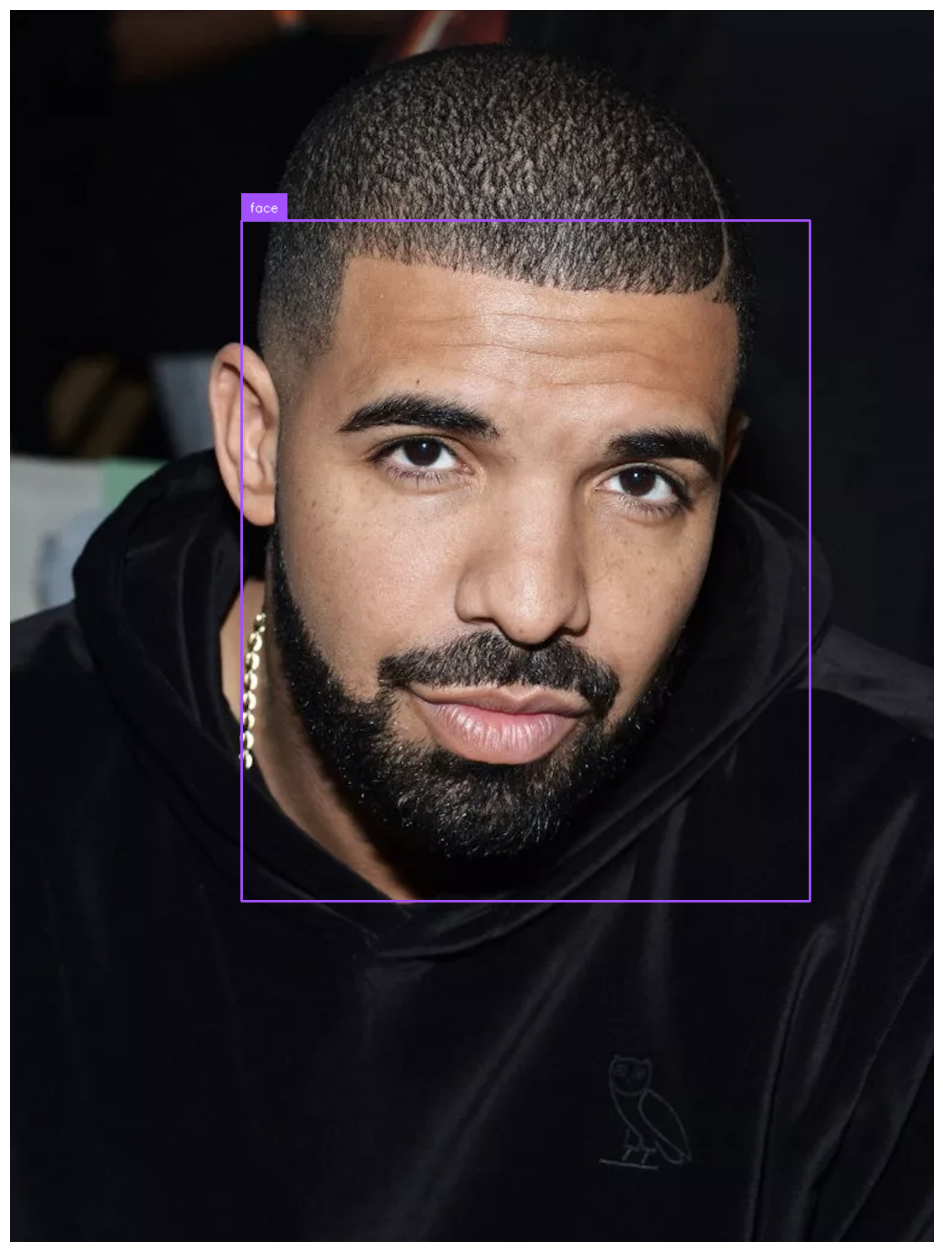

In [10]:
from roboflow import Roboflow
import supervision as sv
import cv2

rf = Roboflow(api_key="YOUR API KEY HERE")
project = rf.workspace().project("face-detection-mik1i")
model = project.version(18).model

result = model.predict("/content/input_faces/input_faces/drake.png", confidence=40, overlap=30).json()
print(result)
#result_conf = result['predictions']['confidence']
#extract predictions
for prediction in result['predictions']:
    label = prediction['class']
    confidence = prediction['confidence']


labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread("/content/input_faces/input_faces/drake.png")

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

Input Image folder Example, pandas confidence score output

Update input_image_path for path to input images

Modify output_image_path before each run to create a new output folder for that run


In [16]:
from roboflow import Roboflow
import supervision as sv
import cv2
import os
import pandas as pd
from IPython.display import display

rf = Roboflow(api_key="YOUR API KEY HERE")
project = rf.workspace().project("face-detection-mik1i")
model = project.version(18).model

#path to input image folder
input_image_path = "/content/input_faces/input_faces"

#create output folder, change name before run for new folder
output_image_path = '/content/model_image_output'
os.makedirs(output_image_path,exist_ok=True)

#initialize pandas Dataframe
#df = pd.DataFrame(columns=['image_filename','label','confidence'])
rows=[]

#process each image in folder
for image_filename in os.listdir(input_image_path):
  image_path = os.path.join(input_image_path, image_filename)

  if os.path.isfile(image_path) and image_path.endswith(('.png','.jpg','.jpeg')):
    result = model.predict(image_path, confidence=80, overlap=30).json()
    #print(result)

    #get confidence
    #result_conf = result.get('confidence')

    #extract labels
    labels = [item['class'] for item in result['predictions']]

    #extract predictions.
    for prediction in result['predictions']:
      label = prediction['class']
      confidence = prediction['confidence']

      #append each prediction to dataframe
      #df = df.append({
      #    'image_filename': image_filename,
      #    'label': label,
      #    'confidence': confidence
      #},ignore_index=True)
      rows.append({
          'image_filename': image_filename,
          'label': label,
          'confidence': confidence
      })


    #convert to detections object
    detections = sv.Detections.from_roboflow(result)

    #initialize annotators
    label_annotator = sv.LabelAnnotator()
    bounding_box_annotator = sv.BoxAnnotator()

    #read image
    image = cv2.imread(image_path)

    #annotate image
    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections, labels=labels)

    #save annotated image
    output_image_path_curr = os.path.join(output_image_path,image_filename)
    cv2.imwrite(output_image_path_curr,annotated_image)

    #display annotated image
    #sv.plot_image(image=annotated_image,size=(16,16))

print("Output images saved in:", output_image_path)

#create DataFrame from rows
df = pd.DataFrame(rows)

#show Dataframe
print("Output Dataframe")
display(df)

loading Roboflow workspace...
loading Roboflow project...


SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. 

Output images saved in: /content/model_image_output
Output Dataframe


SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


,image_filename,label,confidence
0,Kim_k.jpeg,face,0.936085
1,ohtani.png,face,0.896525
2,Jennifer_aniston.jpeg,face,0.929883
3,jennifer_lawrence.jpeg,face,0.916616
4,jon_hamm.jpeg,face,0.806710
5,lebron_james.png,face,0.832868
6,anthony_edwards.png,face,0.926684
7,chris_hemsworth.jpeg,face,0.892860
8,messi.png,face,0.920666
9,steve_carrell.jpg,face,0.898295
